In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [99]:
path = "./winequality-white.csv"
df = pd.read_csv(path , header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
print(df)
print("\n========= First instances ========= \n")
print(f'Nombre intance {len(df)}')
print(f'Nombre de caractéristiques {len(df.columns)}')



========= Dataset summary ========= 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8    

In [100]:
X = df.drop("quality", axis =1) 
Y = df["quality"]

print("\n========= Wine Qualities ========= \n")
print(Y.unique())
df.groupby('quality')['pH'].count()


========= Wine Qualities ========= 

[6 5 7 8 4 3 9]


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: pH, dtype: int64

# Question 3

/tmp/ipykernel_18981/200243729.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels (),rotation =90)


<Axes: >

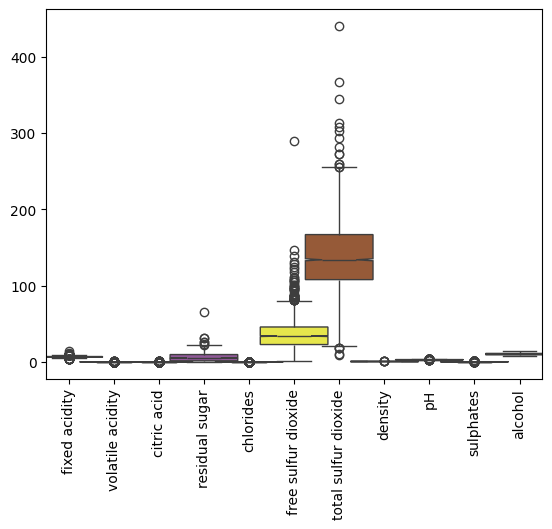

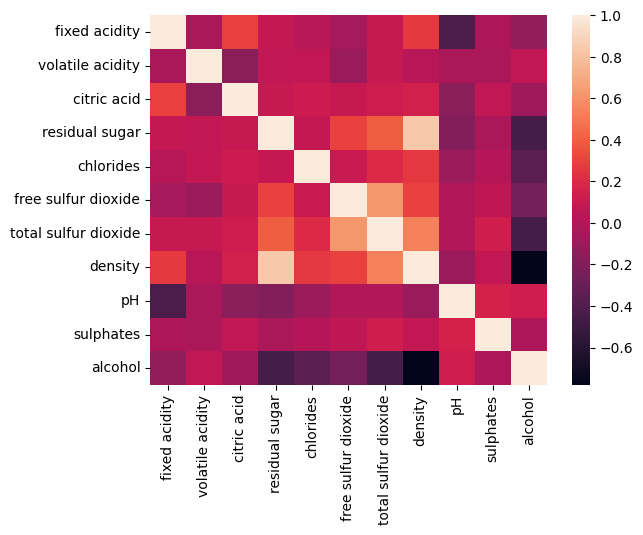

In [107]:
plt.figure ()
sb.boxplot(data=X,orient="v",palette="Set1",width =1.5, notch=True)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels (),rotation =90)
plt.figure ()
corr = X.corr()
sb.heatmap(corr)

In [108]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


## On voit que la varible 'total sulfur dioxide' a la plus grande variance et la plus grande moyenne .On voit aussi des valeurs extremes sur cette variable.
## Les autres variables ont des variances plutot faible
## Certaines caracteristiques sont plutot corrélées entre elles commme parexemple residar sugar et density

# 2 Classification

# 2.1)  Préparation des données

In [96]:
df['quality']

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [104]:
s=[0 if i<5 else 1 for i in Y]
Y=s

# 2.1 Préparation des données

In [116]:
X_train,X_Test,Y_train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)